
# Text Classification Using Naive Bayes and Sentiment Analysis on Blog Posts


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import re


In [2]:
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df.shape

(2000, 2)

In [4]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
df.columns.tolist()

['Data', 'Labels']

In [6]:
df.isnull().sum()

,0
Data,0
Labels,0


In [9]:
df.value_counts()

Data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

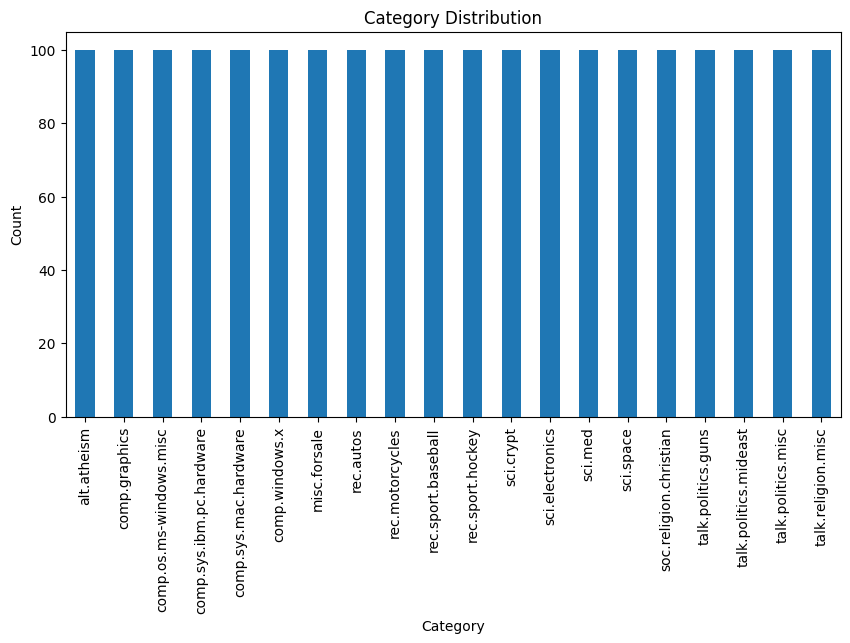

In [10]:
# Plot category distribution
plt.figure(figsize=(10,5))
df['Labels'].value_counts().plot(kind='bar')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [11]:
# Text Cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', ' ', text)
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean'] = df['Data'].apply(clean_text)
df[['Data','clean']].head()


,Data,clean
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupe srv cs cmu edu magnesium club ...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups alt atheism path cantaloupe srv cs ...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupe srv cs cmu edu das news harvar...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupe srv cs cmu edu magnesium club ...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupe srv cs cmu edu alt atheism tal...


In [13]:
# Split data
X = df['clean']
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.95, min_df=2)),
    ('nb', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.915

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       1.00      0.65      0.79        20
           comp.graphics       0.90      0.95      0.93        20
 comp.os.ms-windows.misc       1.00      1.00      1.00        20
comp.sys.ibm.pc.hardware       0.83      1.00      0.91        20
   comp.sys.mac.hardware       1.00      0.95      0.97        20
          comp.windows.x       1.00      0.85      0.92        20
            misc.forsale       0.91      1.00      0.95        20
               rec.autos       0.91      1.00      0.95        20
         rec.motorcycles       1.00      0.95      0.97        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       1.00      0.85      0.92        20
                 sci.med       0.9

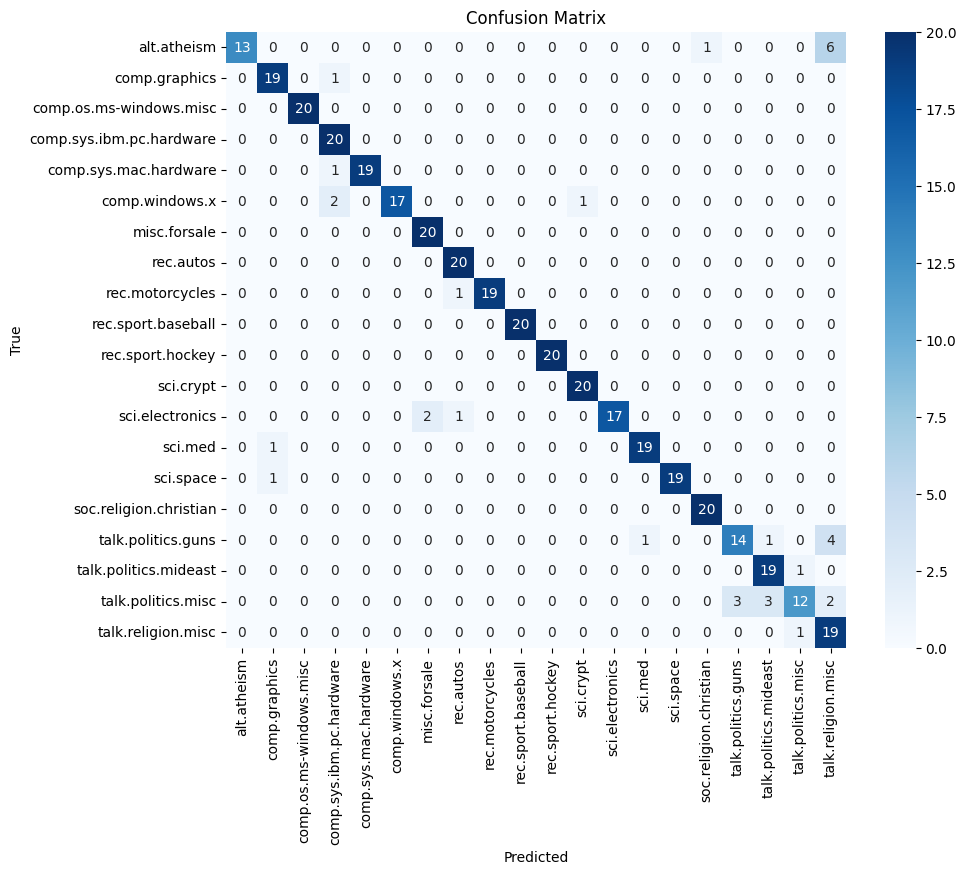

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Sentiment
neutral     1249
positive     611
negative     140
Name: count, dtype: int64


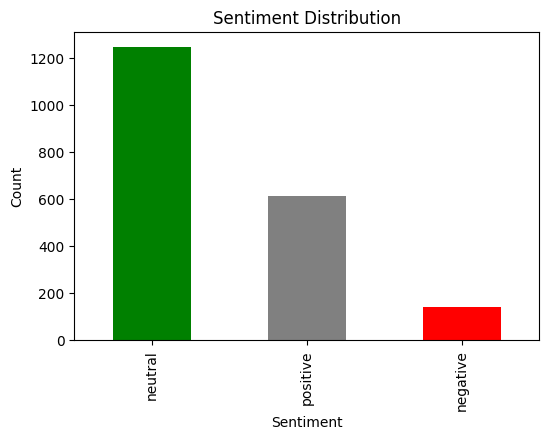

In [15]:
# Simple Lexicon-Based Sentiment Analysis
positive_words = set("good great awesome excellent happy joy love liked wonderful positive beneficial success enjoy enjoyed excited useful helpful fantastic amazing perfect".split())
negative_words = set("bad terrible awful horrible sad hate disliked problematic poor disappointing worse worst angry frustrating".split())

def lexicon_sentiment(text):
    toks = text.split()
    pos = sum(1 for t in toks if t in positive_words)
    neg = sum(1 for t in toks if t in negative_words)
    if pos - neg > 0:
        return 'positive'
    elif pos - neg < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['clean'].apply(lexicon_sentiment)
print(df['Sentiment'].value_counts())

# Plot sentiment distribution
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green','gray','red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



### Evaluation Summary

- **Model Used:** Multinomial Naive Bayes  
- **Feature Extraction:** TF-IDF (1-2 grams)  
- **Performance Metrics:** Accuracy, Precision, Recall, F1-score  
- **Sentiment Analysis:** Simple lexicon-based approach (positive, negative, neutral)
